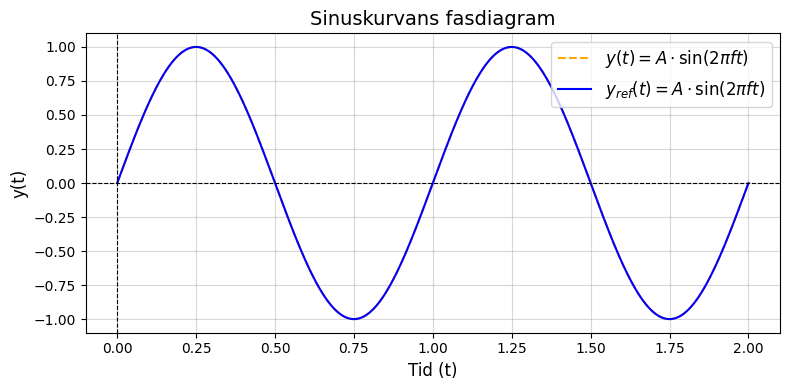

In [21]:
# Kapitel 1 - Sinuskurvan 

import numpy as np
import matplotlib.pyplot as plt

# Variables
A = 1          # Amplitude (start at 1)
f = 1          # Frequency in Hz (start at 1)
phi = 0        # Phase shift in radians (start at 0 -> np.pi / 2)

# Time values
t = np.linspace(0, 2, 500)  # Time values from 0 to 2 seconds

# Sine wave formula
y = A * np.sin(2 * np.pi * f * t + phi)

# Reference wave (cosine wave for comparison)
y_ref = 1 * np.sin(2 * np.pi * 1 * t)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t, y, label=r"$y(t) = A \cdot \sin(2 \pi f t)$", color="orange", linestyle="--")
plt.plot(t, y_ref, label=r"$y_{ref}(t) = A \cdot \sin(2 \pi f t)$", color="blue")
plt.title("Sinuskurvans fasdiagram", fontsize=14)
plt.xlabel("Tid (t)", fontsize=12)
plt.ylabel("y(t)", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Save as PNG
#plt.savefig("sine_wave_with_reference.png")
#plt.show()


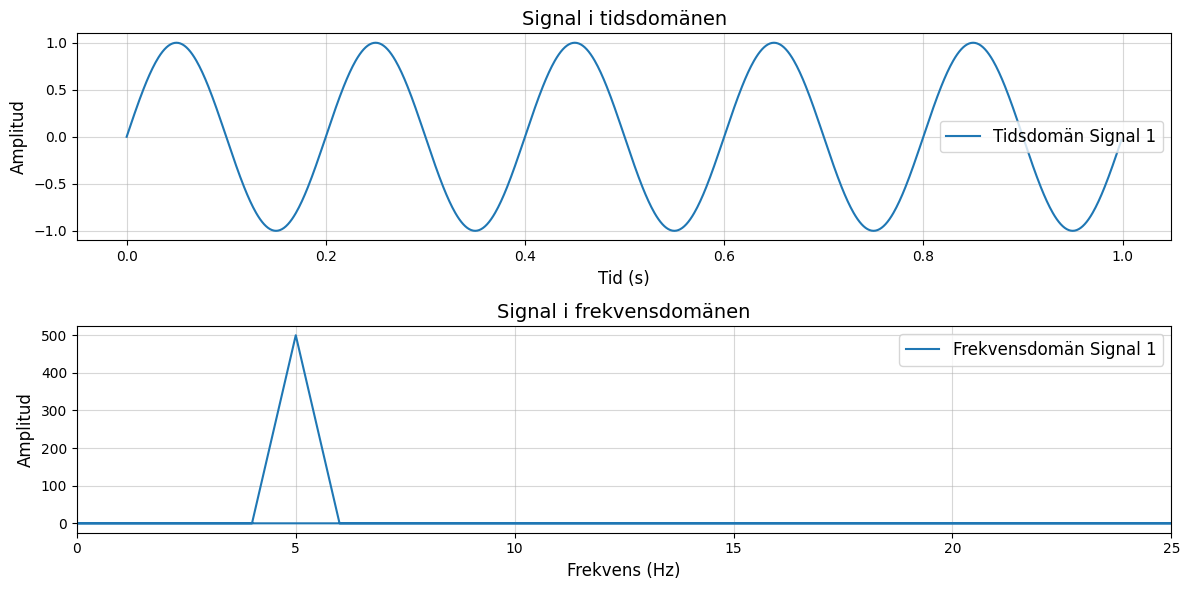

In [22]:
# Kapitel 2 - Tidsdomän och frekvensdomän

# Variables
num_signals_to_plot = 1  # Number of signals to plot (up to 4)

# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration
frequencies = [5, 10, 15, 20]  # Frequencies of the signals (Hz)
amplitudes = [1, 2, 3, 4]  # Amplitudes of the signals

# Generate sine waves in the time domain
time_domain_signals = [A * np.sin(2 * np.pi * f * t) for A, f in zip(amplitudes[:num_signals_to_plot], frequencies[:num_signals_to_plot])]

# Compute the Fourier Transform to get the frequency domain representation
frequency_domain_signals = [np.fft.fft(signal) for signal in time_domain_signals]
frequency = np.fft.fftfreq(len(t), 1/fs)

# Plotting
plt.figure(figsize=(12, 6))

# Time domain plot
plt.subplot(2, 1, 1)
for i, time_signal in enumerate(time_domain_signals):
    plt.plot(t, time_signal, label=f"Tidsdomän Signal {i+1}")
plt.title("Signal i tidsdomänen", fontsize=14)
plt.xlabel("Tid (s)", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

# Frequency domain plot
plt.subplot(2, 1, 2)
for i, freq_signal in enumerate(frequency_domain_signals):
    plt.plot(frequency, np.abs(freq_signal), label=f"Frekvensdomän Signal {i+1}")
plt.title("Signal i frekvensdomänen", fontsize=14)
plt.xlabel("Frekvens (Hz)", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.xlim(0, 25)  # Limit x-axis to show relevant frequency range

plt.tight_layout()
plt.show()

In [ ]:
# EOF index.md

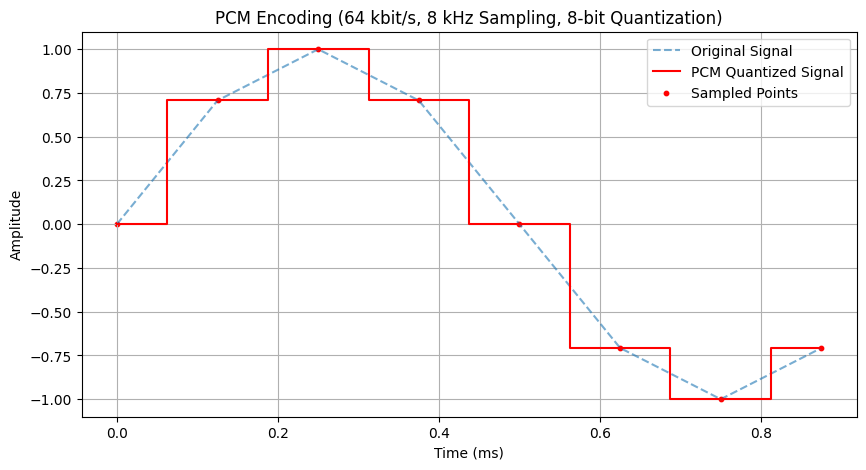

In [7]:
# PCM Parameters
fs = 8000  # Sampling rate (8 kHz for 64kbit/s PCM)
bit_depth = 8  # 8-bit PCM
quantization_levels = 2**bit_depth  # 256 levels

# Generate a test signal (1 kHz sine wave)
t = np.linspace(0, 1e-3, int(fs * 1e-3), endpoint=False)  # 1 ms time frame
f_sine = 1000  # 1 kHz sine wave
signal = np.sin(2 * np.pi * f_sine * t)  # Original signal

# Quantization (PCM Encoding)
signal_min, signal_max = -1, 1  # Normalize between -1 and 1
quantized_signal = np.round(((signal - signal_min) / (signal_max - signal_min)) * (quantization_levels - 1))
quantized_signal = quantized_signal / (quantization_levels - 1) * 2 - 1  # Map back to -1 to 1 range

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t * 1e3, signal, label="Original Signal", linestyle="dashed", alpha=0.6)
plt.step(t * 1e3, quantized_signal, label="PCM Quantized Signal", where='mid', color='r')
plt.scatter(t * 1e3, quantized_signal, color='red', s=10, label="Sampled Points")

plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("PCM Encoding (64 kbit/s, 8 kHz Sampling, 8-bit Quantization)")
plt.legend()
plt.grid()
plt.show()

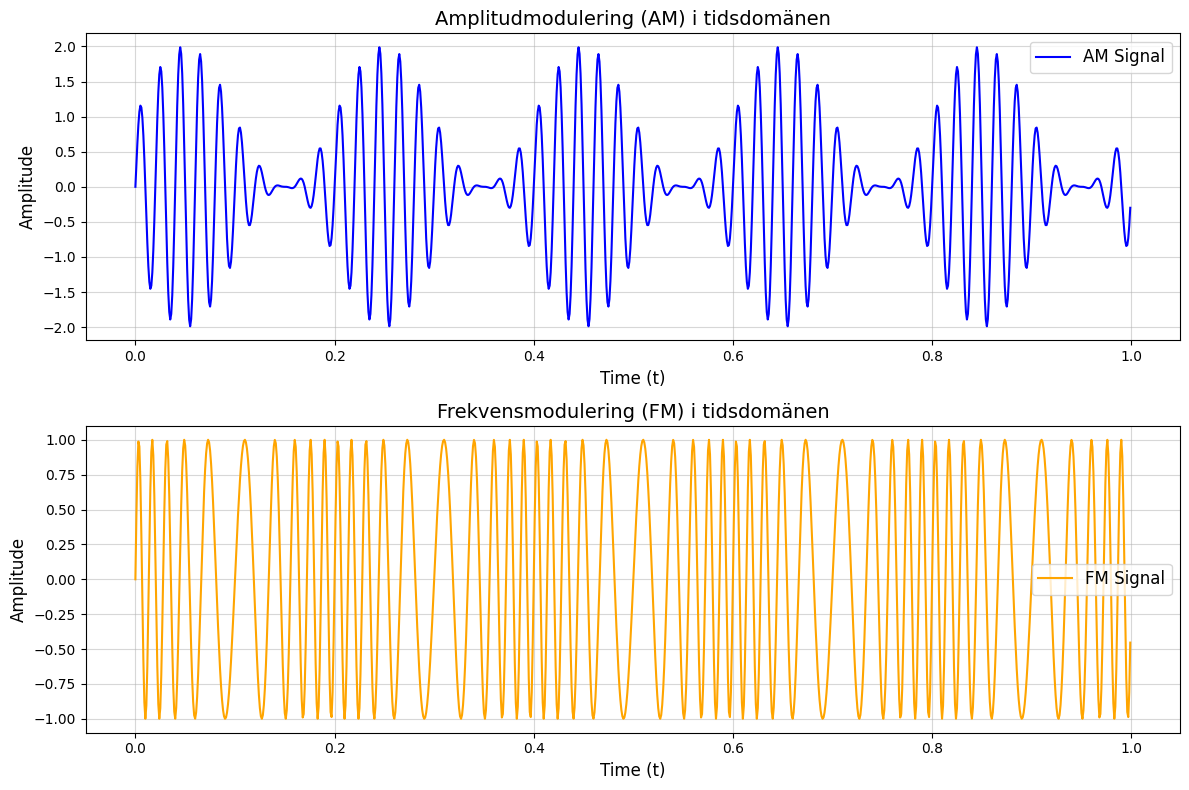

In [ ]:
# Kapitel 1

# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration
fc = 50    # Carrier frequency (Hz)
fm = 5     # Modulating signal frequency (Hz)
Am = 1     # Amplitude of modulating signal
Ac = 1     # Amplitude of carrier signal
beta = 5   # Modulation index for FM

# Modulating signal
modulating_signal = Am * np.sin(2 * np.pi * fm * t)

# Carrier signal
carrier_signal = Ac * np.sin(2 * np.pi * fc * t)

# Amplitude Modulation (AM)
am_signal = (1 + modulating_signal) * carrier_signal

# Frequency Modulation (FM)
fm_signal = Ac * np.sin(2 * np.pi * fc * t + beta * modulating_signal)

# Plotting
plt.figure(figsize=(12, 8))

# AM signal
plt.subplot(2, 1, 1)
plt.plot(t, am_signal, label="AM Signal", color="blue")
plt.title("Amplitudmodulering (AM) i tidsdomänen", fontsize=14)
plt.xlabel("Time (t)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

# FM signal
plt.subplot(2, 1, 2)
plt.plot(t, fm_signal, label="FM Signal", color="orange")
plt.title("Frekvensmodulering (FM) i tidsdomänen", fontsize=14)
plt.xlabel("Time (t)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig("am_fm_time_domain.png")
plt.show()

